# **importing libraries and loading clustered dataframe**

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [48]:
classified_df = pd.read_csv('classified_df.csv')

# **Statistical Analysis**

In [49]:
# Find the maximum values of each column
max_values = classified_df.max()

# Find the minimum values of each column
min_values = classified_df.min()

print("Maximum values of each column:")
print(max_values)
print("\nMinimum values of each column:")
print(min_values)

Maximum values of each column:
average_monthly_spend              2.776545
average_monthly_visit_frequency    2.859750
average_monthly_basket_size        2.221448
Cluster                            4.000000
dtype: float64

Minimum values of each column:
average_monthly_spend             -1.012376
average_monthly_visit_frequency   -1.111639
average_monthly_basket_size       -1.022691
Cluster                            0.000000
dtype: float64


# **Statistical analysis of each cluster**

# **Boxplot of each cluster**

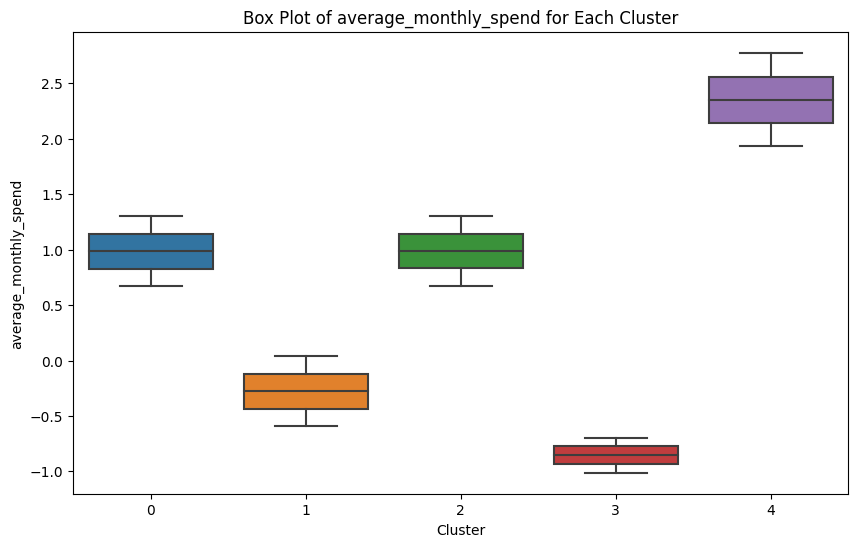

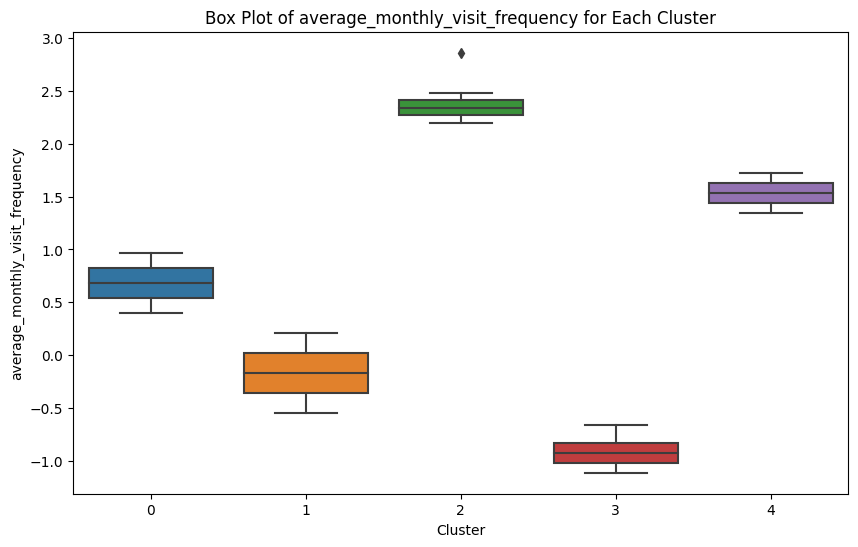

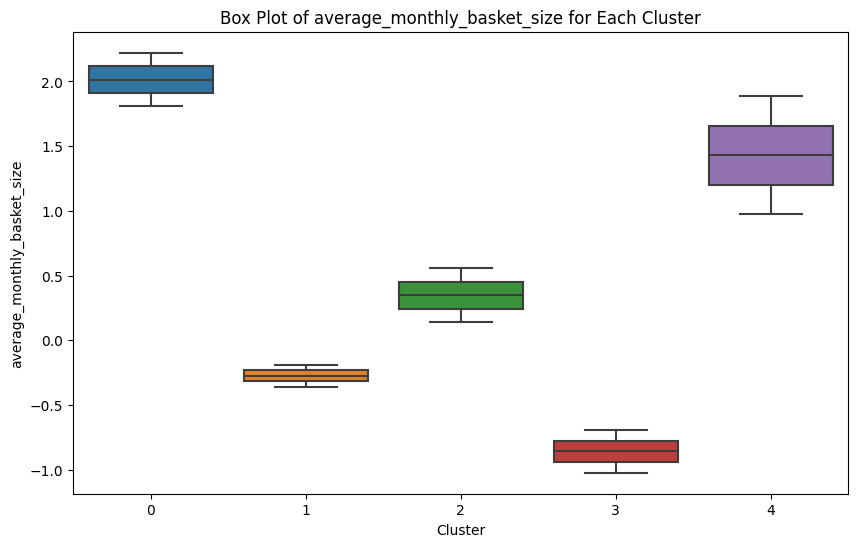

In [50]:
# Iterate over each feature and create box plots for each cluster
for feature in classified_df.drop(columns=['Cluster']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=classified_df)
    plt.title(f'Box Plot of {feature} for Each Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [51]:
# Computing general statistics for each cluster

cluster_groups = classified_df.groupby('Cluster')


cluster_stats = cluster_groups.describe()
means_only = cluster_stats.loc[:, (slice(None), 'mean')]
cluster_stats

average_monthly_spend                                          \
                        count      mean       std       min       25%   
Cluster                                                                 
0                     66407.0  0.986098  0.182372  0.671617  0.828239   
1                    190114.0 -0.275571  0.182310 -0.591399 -0.433335   
2                     37976.0  0.987291  0.182295  0.671596  0.830518   
3                    189962.0 -0.854657  0.091169 -1.012376 -0.933586   
4                     47491.0  2.353395  0.241565  1.934591  2.145974   

                                      average_monthly_visit_frequency  \
              50%       75%       max                           count   
Cluster                                                                 
0        0.985282  1.143661  1.303072                         66407.0   
1       -0.275903 -0.117776  0.040078                        190114.0   
2        0.987440  1.145703  1.303072                         37976.0   
3       -0.854775 -0.775670 -0.696669                        189962.0   
4        2.352495  2.560047  2.776545                         47491.0   

                   ...                     average_monthly_basket_size  \
             mean  ...       75%       max                       count   
Cluster            ...                                                   
0        0.684013  ...  0.824886  0.966721                     66407.0   
1       -0.166786  ...  0.023043  0.210266                    190114.0   
2        2.339187  ...  2.411550  2.859750                     37976.0   
3       -0.923542  ... -0.829860 -0.657766                    189962.0   
4        1.534815  ...  1.628619  1.723176                     47491.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
Cluster                                                                        
0        2.013870  0.120158  1.806258  1.910264  2.013437  2.117443  2.221448  
1       -0.274369  0.048015 -0.357056 -0.316286 -0.274683 -0.233081 -0.191479  
2        0.349536  0.120074  0.142170  0.245344  0.350181  0.454187  0.557360  
3       -0.856912  0.096043 -1.022691 -0.940319 -0.857114 -0.773910 -0.690705  
4        1.430439  0.264178  0.974214  1.201778  1.430174  1.658987  1.888631  

[5 rows x 24 columns]

In [52]:
#Considering means only
means_only


,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
,mean,mean,mean
Cluster,,,
0,0.986098,0.684013,2.013870
1,-0.275571,-0.166786,-0.274369
2,0.987291,2.339187,0.349536
3,-0.854657,-0.923542,-0.856912
4,2.353395,1.534815,1.430439


In [53]:
#Labelling the mean values according to their value

# Compute means for each cluster
cluster_means = cluster_groups.mean()

# Since the data is standardized, we can interpret the means as z-scores. Hence they can be classified as follows
def classify_mean(mean):
    if mean <-0.7:
        return 'low'
    elif mean < 0.7:
        return 'average'
    elif mean < 2:
        return 'high'
    else:
        return 'very high'
      
classified_means = cluster_means.copy()
for column in cluster_means.columns:
    classified_means[column] = cluster_means[column].apply(classify_mean)
classified_means


,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
Cluster,,,
0,high,average,very high
1,average,average,average
2,high,very high,average
3,low,low,low
4,very high,high,high


# **Mapping cluster numbers to each of the customer segments according to the standardized values**

In [54]:
# Map clusters numbers with customer category
cluster_names = {
    0: "High end - Loyal",
    1: "Medium level",
    2: "High end - Frequent",
    3: "Low level",
    4: "High end - Premium"
}

# Replace integer cluster labels with customer segment names
classified_df['Cluster'] = classified_df['Cluster'].map(cluster_names)
classified_df.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Cluster
0,-0.995767,-1.090837,-0.869595,Low level
1,2.710806,1.675897,1.708909,High end - Premium
2,-0.201091,0.178116,-0.213112,Medium level
3,0.012986,0.119491,-0.270523,Medium level
4,2.615198,1.377098,1.811251,High end - Premium


In [55]:
classified_df.to_csv('evaluated_df.csv', index=False)